In [20]:
import zipfile


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_dir="C:/Users/admin/Downloads/cats-and-dogs/train"
test_dir="C:/Users/admin/Downloads/cats-and-dogs/val"

In [5]:
train_gen=ImageDataGenerator(rescale=1/255.)
test_gen=ImageDataGenerator(rescale=1/255.)

In [6]:
train=train_gen.flow_from_directory(train_dir,target_size=(224,224),class_mode="binary",batch_size=32)
test=test_gen.flow_from_directory(test_dir,target_size=(224,224),class_mode="binary",batch_size=32)

Found 275 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [7]:
import tensorflow as tf

In [8]:
base=tf.keras.applications.VGG16(include_top=False)
base.trainable=False
inputs=tf.keras.layers.Input((224,224,3))
x=base(inputs,training=False)
x=tf.keras.layers.GlobalAvgPool2D()(x)
outputs=tf.keras.layers.Dense(1,activation="sigmoid")(x)
model1=tf.keras.Model(inputs,outputs)

58889256/58889256 [==============================] - 18s 0us/step


In [9]:
model1.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [10]:
model1.fit(train,epochs=10,validation_data=test)

Epoch 1/10
9/9 [==============================] - 55s 6s/step - loss: 0.6417 - accuracy: 0.6545 - val_loss: 0.6291 - val_accuracy: 0.6571
Epoch 2/10
9/9 [==============================] - 57s 6s/step - loss: 0.6265 - accuracy: 0.6545 - val_loss: 0.6217 - val_accuracy: 0.6571
Epoch 3/10
9/9 [==============================] - 59s 7s/step - loss: 0.6184 - accuracy: 0.6545 - val_loss: 0.6151 - val_accuracy: 0.6571
Epoch 4/10
9/9 [==============================] - 60s 7s/step - loss: 0.6113 - accuracy: 0.6545 - val_loss: 0.6084 - val_accuracy: 0.6571
Epoch 5/10
9/9 [==============================] - 57s 6s/step - loss: 0.6022 - accuracy: 0.6545 - val_loss: 0.6025 - val_accuracy: 0.6571
Epoch 6/10
9/9 [==============================] - 57s 6s/step - loss: 0.5966 - accuracy: 0.6545 - val_loss: 0.5979 - val_accuracy: 0.6571
Epoch 7/10
9/9 [==============================] - 57s 7s/step - loss: 0.5875 - accuracy: 0.6545 - val_loss: 0.5910 - val_accuracy: 0.6571
Epoch 8/10
9/9 [==================

In [13]:
def load(path):
  img=tf.io.read_file(path)
  image=tf.image.decode_image(img)
  image=tf.image.resize(image,size=(224,224))
  image=image/255
  return image

In [15]:
doggie = load("C:\\Users\\admin\\Downloads\\cats-and-dogs\\val\\dog\\american_bulldog_144_jpg.rf.fe735e7242d35533bb5fb5ca4ad4197e.jpg")


In [16]:
pred=tf.round(model1.predict(tf.expand_dims(doggie,axis=0)))
pred

1/1 [==============================] - 0s 306ms/step


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [17]:
classes=["cat","dog"]

Text(0.5, 1.0, 'dog')

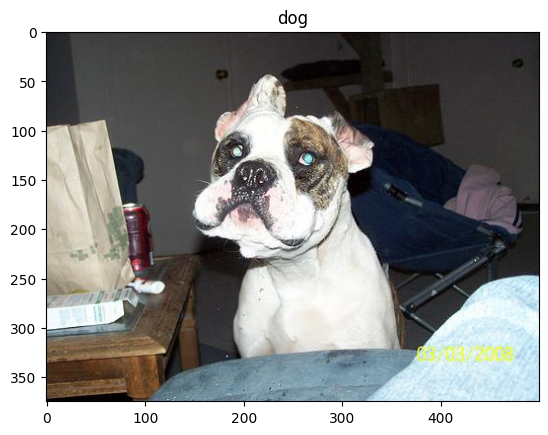

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
dog=mpimg.imread("C:\\Users\\admin\\Downloads\\cats-and-dogs\\val\\dog\\american_bulldog_144_jpg.rf.fe735e7242d35533bb5fb5ca4ad4197e.jpg")
plt.imshow(dog)
plt.title(classes[int(pred[0])])